In [1]:
# standard imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

# DL imports
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model, Sequential
import glob
from data_loading import load_data

img_filenames = glob.glob('/floyd/input/ut_zappos50k/**/*.jpg', recursive=True)
img_pairs = load_data(img_filenames, cap=1000)

# print(img_pairs[0][1].shape)
# plt.imshow(img_pairs[0][1], cmap='gray');

Processing image 999 of 1000
Elapsed time:  0.4 minutes
Image dimension errors:  0
1000 total images processed


In [3]:
ct = len(img_pairs)
idx = list(range(ct))
np.random.shuffle(idx)
train_index, dev_index, test_index = idx[:-3000], idx[-3000:-1000], idx[-1000:]

train_img_pairs = [img_pairs[i] for i in train_index]
dev_img_pairs = [img_pairs[i] for i in dev_index]
test_img_pairs = [img_pairs[i] for i in test_index]

## Notes
- prev batch runs over 5K images (batch_size 4, epochs 5) turned black and NAN'ed out the metrics by end of 2nd epoch

# Multi-output test 2

In [2]:
from cGAN_multi_out import sketch2pic
cGAN = sketch2pic(name='multicanary_2', generator_activation='tanh')
cGAN.train(img_pairs[:256], img_pairs[:32], batch_size=4, epochs=4, checkpoints_batch_size=8)

cGAN.history.plot_examples(save=True)
cGAN.history.return_metrics()

(?, 5)


ValueError: Index out of range using input dim 2; input has only 2 dims for 'loss_1/model_2_loss/strided_slice_1' (op: 'StridedSlice') with input shapes: [?,5], [4], [4], [4] and with computed input tensors: input[3] = <1 1 1 1>.

## Multi-output test 1

(?, 7)
compiled generator
Running epoch 1 of 4...             
Running epoch 2 of 4...             
Running epoch 3 of 4...             
Running epoch 4 of 4...             
Training completed in 63 minutes             


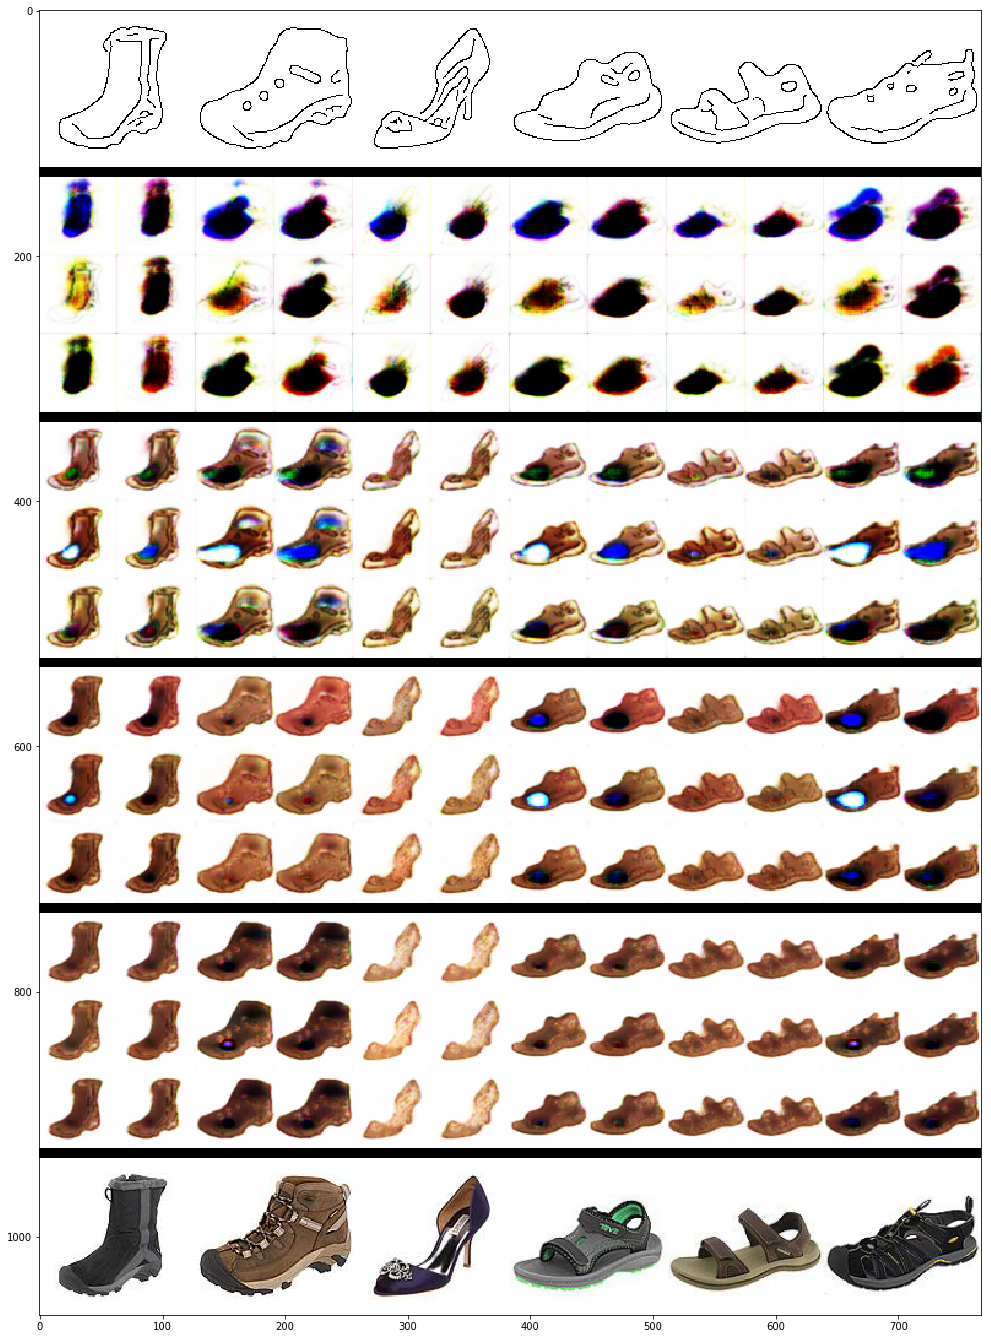

checkpoint  cGAN train_loss  cGAN dev_loss  disc_mean_train_acc  \
0         0.00            106.9          106.9                  0.5   
1         0.25              NaN            NaN                  0.0   
2         0.50              NaN            NaN                  0.0   
3         0.75              NaN            NaN                  0.0   
4         1.00              NaN            NaN                  0.0   
5         1.25              NaN            NaN                  0.0   
6         1.50              NaN            NaN                  0.0   
7         1.75              NaN            NaN                  0.0   
8         2.00              NaN            NaN                  0.0   
9         2.25              NaN            NaN                  0.0   
10        2.50              NaN            NaN                  0.0   
11        2.75              NaN            NaN                  0.0   
12        3.00              NaN            NaN                  0.0   
13        3.25              NaN            NaN                  0.0   
14        3.50              NaN            NaN                  0.0   
15        3.75              NaN            NaN                  0.0   
16        4.00              NaN            NaN                  0.0   

    disc_mean_dev_acc  disc_train_acc_real  disc_train_acc_fake  \
0                 0.5                  1.0                  0.0   
1                 0.0                  0.0                  0.0   
2                 0.0                  0.0                  0.0   
3                 0.0                  0.0                  0.0   
4                 0.0                  0.0                  0.0   
5                 0.0                  0.0                  0.0   
6                 0.0                  0.0                  0.0   
7                 0.0                  0.0                  0.0   
8                 0.0                  0.0                  0.0   
9                 0.0                  0.0                  0.0   
10                0.0                  0.0                  0.0   
11                0.0                  0.0                  0.0   
12                0.0                  0.0                  0.0   
13                0.0                  0.0                  0.0   
14                0.0                  0.0                  0.0   
15                0.0                  0.0                  0.0   
16                0.0                  0.0                  0.0   

    disc_dev_acc_real  disc_dev_acc_fake  
0                 1.0                0.0  
1                 0.0                0.0  
2                 0.0                0.0  
3                 0.0                0.0  
4                 0.0                0.0  
5                 0.0                0.0  
6                 0.0                0.0  
7                 0.0                0.0  
8                 0.0                0.0  
9                 0.0                0.0  
10                0.0                0.0  
11                0.0                0.0  
12                0.0                0.0  
13                0.0                0.0  
14                0.0                0.0  
15                0.0                0.0  
16                0.0                0.0

In [3]:
from cGAN_multi_out import sketch2pic
cGAN = sketch2pic(name='multicanary', generator_activation='tanh')
cGAN.train(img_pairs[:800], img_pairs[:64], batch_size=4, epochs=4, checkpoints_batch_size=16)

cGAN.history.plot_examples(save=True)
cGAN.history.return_metrics()

## Optimized tests

compiled discriminators
compiled generator
Running epoch 1 of 3...             
Running epoch 2 of 3...             
Running epoch 3 of 3...             
Training completed in 2 minutes             


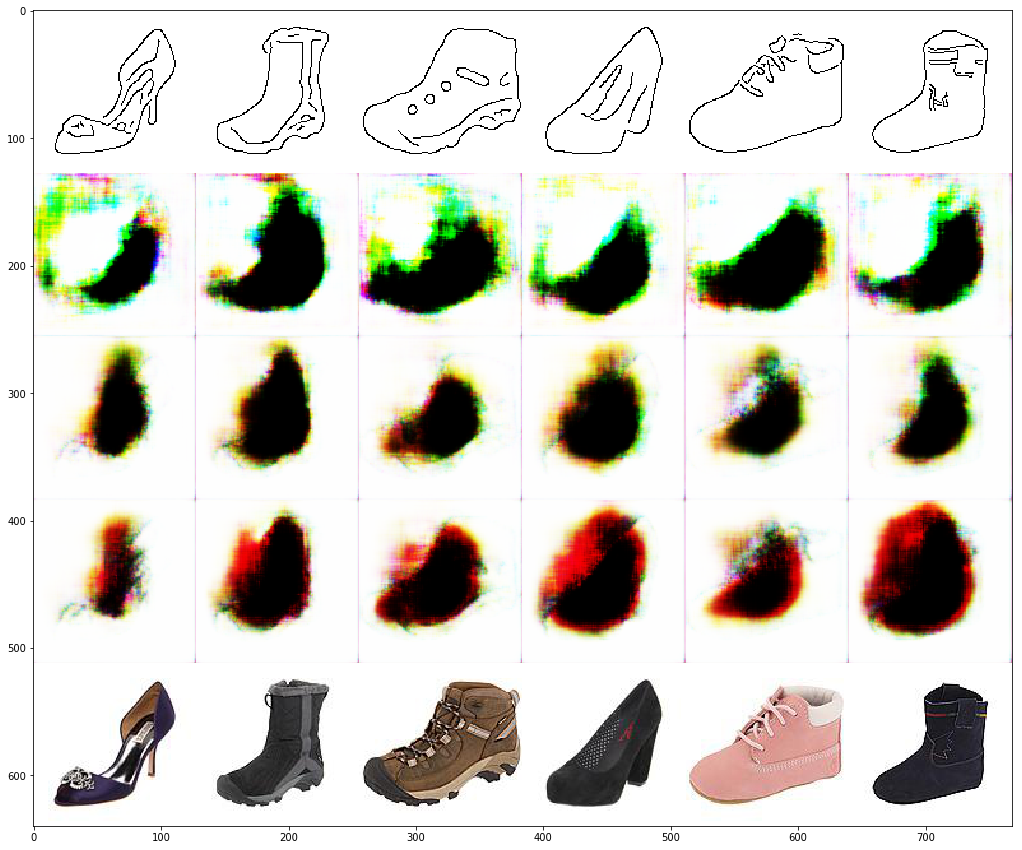

checkpoint  cGAN train_loss  cGAN dev_loss  disc_mean_train_acc  \
0         0.00           245.92         245.92                 0.50   
1         0.24           283.05         277.88                 0.50   
2         0.48           167.71         178.30                 0.50   
3         0.72           112.81         120.72                 0.50   
4         0.96            66.64          66.04                 0.55   
5         1.24            75.03          88.00                 0.50   
6         1.48            96.58          92.09                 0.75   
7         1.72            57.54          66.01                 0.25   
8         1.96            74.03          74.60                 0.40   
9         2.24            62.12          67.00                 0.50   
10        2.48            86.15          82.44                 0.50   
11        2.72            65.90          76.64                 0.50   
12        2.96            85.02          81.56                 0.50   

    disc_mean_dev_acc  disc_train_acc_real  disc_train_acc_fake  \
0                0.50                  1.0                  0.0   
1                0.50                  0.0                  1.0   
2                0.50                  0.0                  1.0   
3                0.50                  0.0                  1.0   
4                0.55                  0.3                  0.8   
5                0.45                  1.0                  0.0   
6                0.70                  0.8                  0.7   
7                0.15                  0.5                  0.0   
8                0.40                  0.8                  0.0   
9                0.50                  1.0                  0.0   
10               0.50                  1.0                  0.0   
11               0.45                  1.0                  0.0   
12               0.50                  1.0                  0.0   

    disc_dev_acc_real  disc_dev_acc_fake  
0                 1.0                0.0  
1                 0.0                1.0  
2                 0.0                1.0  
3                 0.0                1.0  
4                 0.4                0.7  
5                 0.9                0.0  
6                 0.7                0.7  
7                 0.3                0.0  
8                 0.8                0.0  
9                 1.0                0.0  
10                1.0                0.0  
11                0.9                0.0  
12                1.0                0.0

In [24]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='full_run_opt', generator_activation='tanh')
cGAN.train(img_pairs[:300], img_pairs[:20], batch_size=4, epochs=3, checkpoints_batch_size=10)

cGAN.history.plot_examples(save=True)
cGAN.history.return_metrics()

compiled discriminators
compiled generator
Running epoch 1 of 5...             
Running epoch 2 of 5...             
Running epoch 3 of 5...             
Running epoch 4 of 5...             
Running epoch 5 of 5...             
Training completed in 2 minutes             


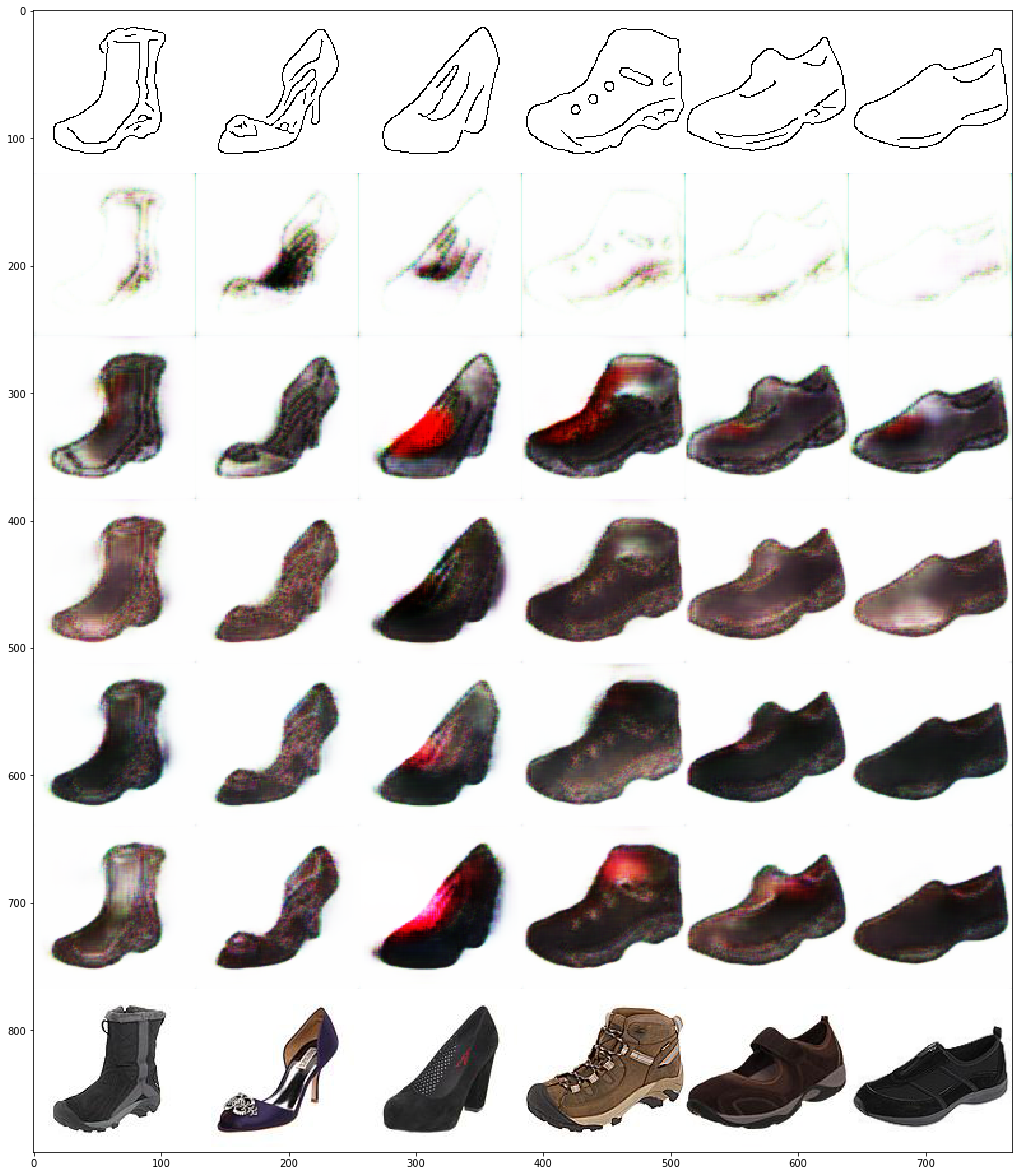

checkpoint  train_loss  dev_loss  train_accuracy  dev_accuracy
0         0.00    11680.92  11680.92            1.36          1.36
1         0.25     3832.80   4672.74            3.52          3.34
2         0.49     2674.09   4524.95            3.29          2.97
3         0.74     3180.11   4521.92            2.80          2.57
4         0.99     3764.76   4333.83            1.80          1.93
5         1.25     1839.39   2913.66            1.47          1.72
6         1.49     1548.93   2707.81            1.56          1.91
7         1.74      930.62   1947.52            2.96          2.58
8         1.99     1447.51   1768.88            1.65          1.82
9         2.25     1024.29   1410.40            1.47          1.69
10        2.49      946.06   2218.49            5.61          6.27
11        2.74      510.35   1382.94            3.87          4.21
12        2.99     1440.75    935.54            4.59          5.63
13        3.25      604.34    797.88            3.54          4.93
14        3.49      266.30   1538.76            7.23          8.21
15        3.74      360.31    977.55            8.10          8.51
16        3.99     1045.31    709.74            5.20          6.27
17        4.25      203.92    432.81            6.87          8.77
18        4.49     -100.67   1356.65           10.25         10.54
19        4.74      143.36    889.99            7.99          8.31
20        4.99     1041.79   1103.71            3.34          3.28

In [7]:
from cGAN_functions_opt import sketch2pic
cGAN = sketch2pic(name='full_run_opt', generator_activation='tanh')
cGAN.train(img_pairs, img_pairs[:20], batch_size=4, epochs=5, checkpoints_batch_size=10)

cGAN.history.plot_examples(save=True)
cGAN.history.return_metrics()

## First full run opt

compiled discriminators
compiled generator
Running epoch 1 of 4...             
Running epoch 2 of 4...             
Running epoch 3 of 4...             
Running epoch 4 of 4...             
Training completed in 77 minutes             


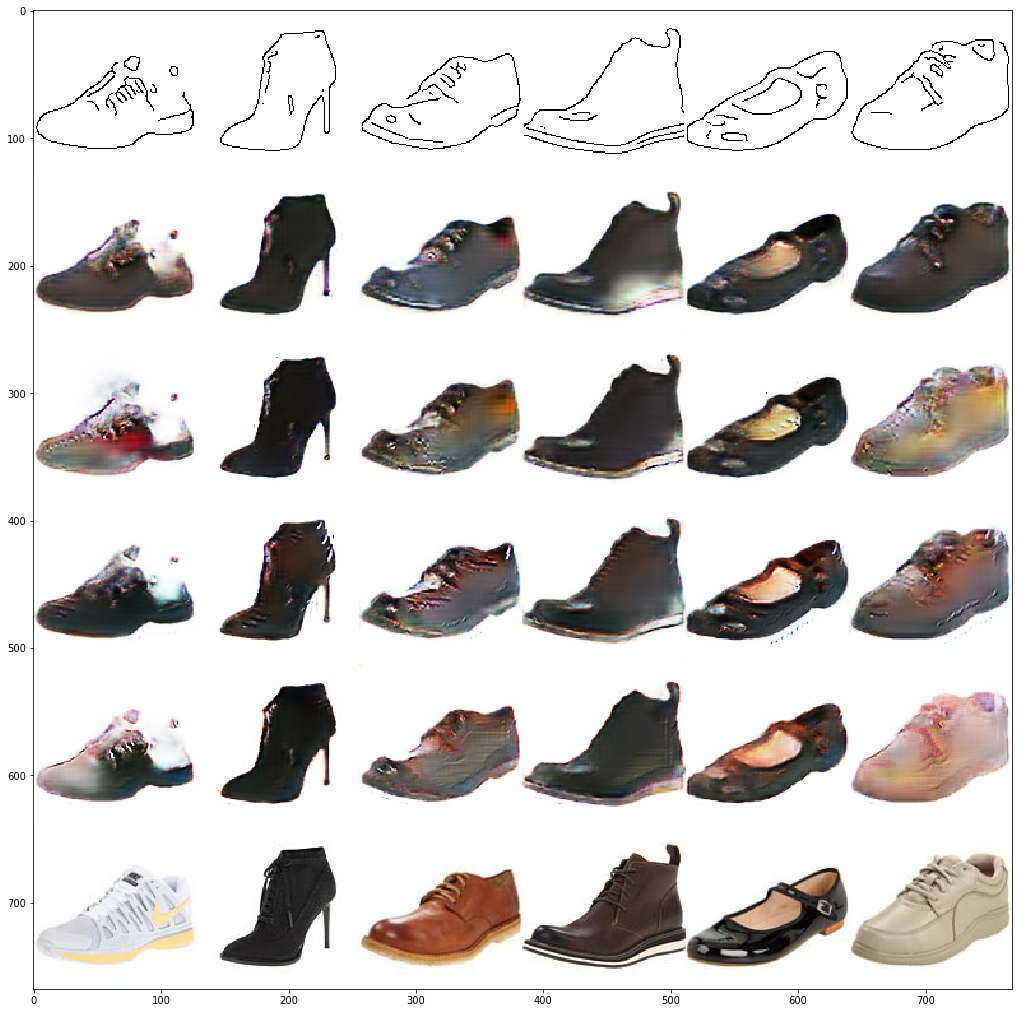

checkpoint  train_loss  dev_loss  train_accuracy  dev_accuracy
0         0.00    12242.39  12130.90            1.15          1.16
1         0.25     1021.48   1526.75            1.47          1.36
2         0.50      826.97   1417.11            2.64          2.66
3         0.75     1061.89   1441.74            1.32          1.34
4         1.00      828.31   1420.02            1.49          1.51
5         1.25      728.04   1307.43            1.82          1.87
6         1.50     1751.75   1857.26            1.17          1.21
7         1.75      706.94   1299.32            2.17          2.00
8         2.00      810.42   1182.71            1.66          1.68
9         2.25      856.16   1261.85            1.38          1.46
10        2.50      893.52   1158.75            1.48          1.48
11        2.75     1011.90   1466.41            1.38          1.47
12        3.00      822.45   1275.95            2.00          2.14
13        3.25      930.88   1281.24            1.31          1.38
14        3.50      769.33   1313.40            1.61          1.68
15        3.75      830.64   1424.22            1.49          1.32
16        4.00      735.82   1151.54            1.43          1.30

In [4]:
from cGAN_functions_opt import sketch2pic
cGAN = sketch2pic(name='full_run_opt', generator_activation='tanh')
cGAN.train(train_img_pairs, dev_img_pairs, batch_size=4, epochs=4)

cGAN.history.plot_examples(save=True)
cGAN.history.save_metrics()
cGAN.save_weights()
cGAN.history.return_metrics()

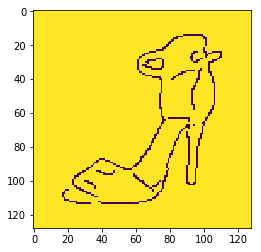

In [7]:
plt.imshow(test_img_pairs[0][1])

In [9]:
plt.imshow(cGAN.image_from_sketch(test_img_pairs[0][1]))

NameError: name 'test_img_pairs' is not defined

## First full run

In [ ]:
from cGAN_functions_opt import sketch2pic
cGAN = sketch2pic(name='full_run', generator_activation='tanh')
cGAN.train(train_img_pairs, dev_img_pairs, batch_size=4, epochs=15)

cGAN.history.plot_examples(save=True)
cGAN.history.save_metrics()
cGAN.save_weights()
cGAN.history.return_metrics()

In [ ]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='full_run', generator_activation='tanh')
cGAN.train(train_img_pairs, dev_img_pairs, batch_size=4, epochs=15)

cGAN.history.plot_examples(save=True)
cGAN.history.save_metrics()
cGAN.save_weights()
cGAN.history.return_metrics()

compiled discriminators
compiled generator
Running epoch 1 of 15...             
Running epoch 2 of 15...             
Running epoch 3 of 15...             
Running epoch 4 of 15...             
Running epoch 5 of 15...             
Running epoch 6 of 15...             
Running epoch 7 of 15...             
Running epoch 8 of 15...             
Running epoch 9 of 15...             
Running epoch 10 of 15...             
Running epoch 11 of 15...             
Running epoch 12 of 15...             
Running epoch 13 of 15...             
Running epoch 14 of 15...             
Running epoch 15 of 15...             
  Training on batch 1725 of 11766

## Benchmarks: optimized vs unoptimized

compiled discriminators
compiled generator
Running epoch 1 of 3...             
Running epoch 2 of 3...             
Running epoch 3 of 3...             
Training completed in 4.33 minutes             


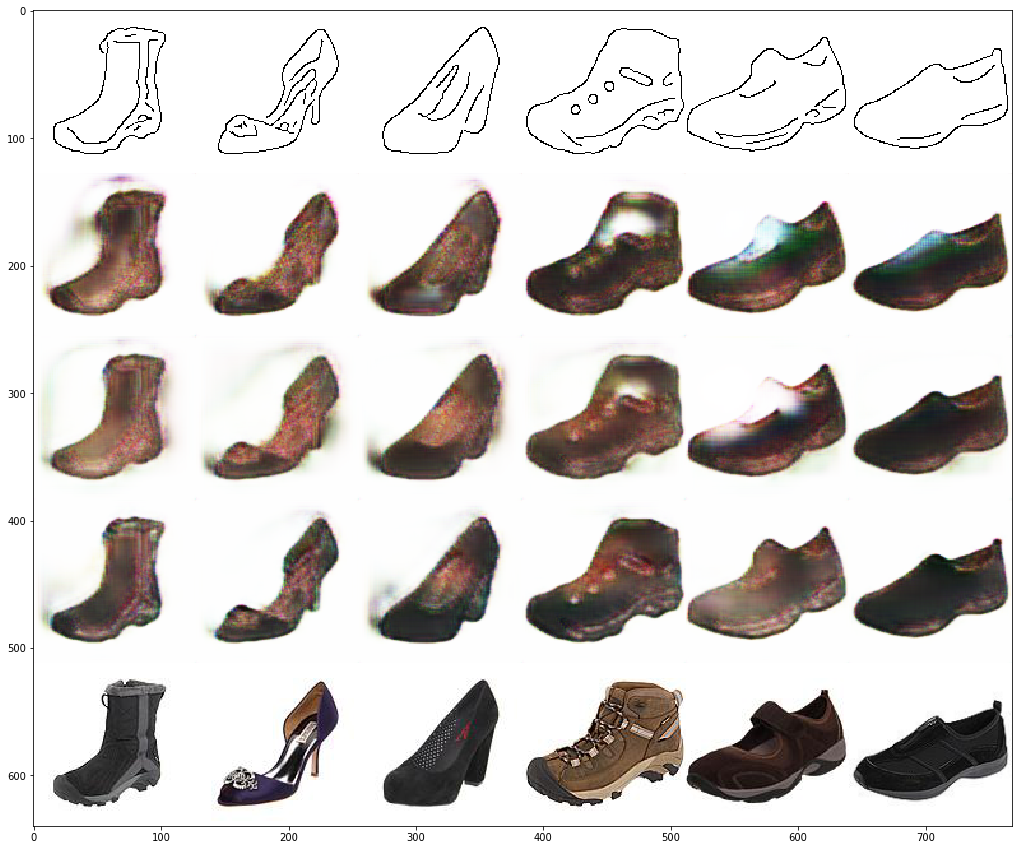

checkpoint  train_loss  dev_loss  train_accuracy  dev_accuracy
0         0.00    10436.77  10436.77            4.04          4.04
1         0.25     2998.99   3951.98            0.79          0.79
2         0.50     1790.04   2192.69            1.78          1.75
3         0.75      977.46   1894.30            1.90          1.71
4         1.00     1184.93   1816.55            1.44          1.39
5         1.25      919.48   1463.42            1.34          1.35
6         1.50     1219.79   1504.63            1.71          1.69
7         1.75      704.88   1621.79            2.49          1.81
8         2.00     1215.25   1793.27            1.24          1.24
9         2.25      995.59   1469.56            1.75          1.72
10        2.50     1014.38   1362.35            1.65          1.80
11        2.75      673.00   1528.82            2.19          1.81
12        3.00     1089.47   1238.27            1.84          1.78

In [14]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='canary', generator_activation='tanh')
cGAN.train(img_pairs, img_pairs[:100], batch_size=4, epochs=3) # 3K image pairs
cGAN.history.plot_examples()
cGAN.history.return_metrics()

compiled discriminators
compiled generator
Running epoch EDITED 1 of 3...             
Running epoch EDITED 2 of 3...             
Running epoch EDITED 3 of 3...             
Training completed in 3.7 minutes             


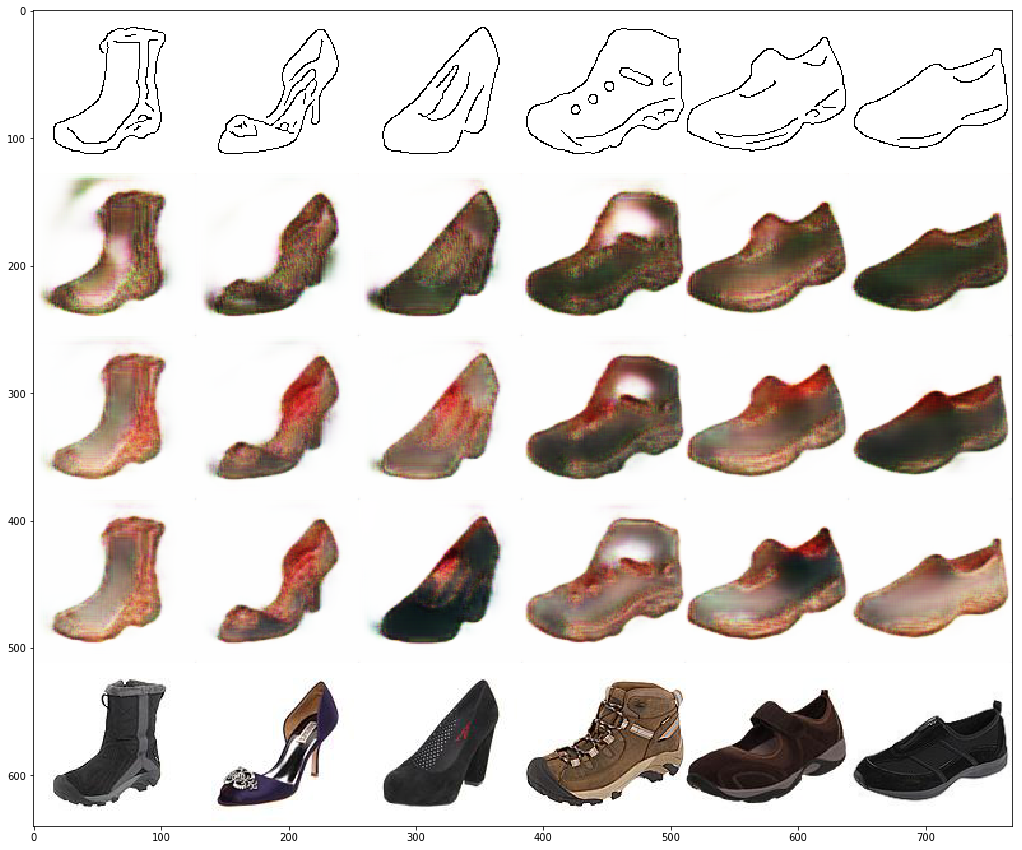

checkpoint  train_loss  dev_loss  train_accuracy  dev_accuracy
0         0.00    13018.53  13018.53            1.24          1.24
1         0.25     2999.70   3946.24            1.28          1.12
2         0.50     2024.10   2395.80            1.41          1.44
3         0.75      758.58   1767.25            4.76          3.71
4         1.00     1091.78   1636.38            3.00          2.64
5         1.25      898.13   1534.13            1.62          1.56
6         1.50     1086.08   1454.98            1.98          2.23
7         1.75      264.06   1267.04            6.14          4.54
8         2.00      742.31   1373.92            4.47          3.57
9         2.25      668.85   1224.49            3.28          2.87
10        2.50     1004.54   1189.06            2.33          2.76
11        2.75      670.54   1449.72            2.05          1.97
12        3.00      103.97    815.09           10.53          8.36

In [15]:
from cGAN_functions_opt import sketch2pic
cGAN = sketch2pic(name='canary', generator_activation='tanh')
cGAN.train(img_pairs, img_pairs[:100], batch_size=4, epochs=3) # 3K img pairs
cGAN.history.plot_examples()
cGAN.history.return_metrics()

In [33]:
cGAN.cGAN.metrics_names

['loss',
 'model_67_loss',
 'prediction_real_loss',
 'prediction_fake_loss',
 'prediction_real_cGAN_loss_pred_real',
 'prediction_fake_cGAN_loss_pred_fake']

In [5]:
cGAN.cGAN.metrics_names

['loss',
 'model_2_loss',
 'prediction_real_loss',
 'prediction_fake_loss',
 'prediction_real_cGAN_loss_pred_real',
 'prediction_fake_cGAN_loss_pred_fake']

In [44]:
cGAN.dual_discriminator.metrics_names

['loss',
 'model_97_loss',
 'model_97_loss',
 'model_97_binary_accuracy',
 'model_97_binary_accuracy_1',
 'model_97_binary_accuracy_2',
 'model_97_binary_accuracy_3']

In [4]:
def get_batches(img_pairs, batch_size):
    num_full_batches = len(img_pairs)//batch_size
    batch_indices = [num*batch_size for num in range(num_full_batches)]
    pair_batches = [ img_pairs[i:i+batch_size] for i in batch_indices ]
    if len(img_pairs) % batch_size != 0:
        pair_batches.append(img_pairs[batch_size*num_full_batches:])
    batches = [
        (
            np.array([img_pair[0] for img_pair in pair_batch]),
            np.array([np.reshape(img_pair[1], (128,128,1)) for img_pair in pair_batch])
        )
        for pair_batch in pair_batches
    ]
    return batches

batches = get_batches(img_pairs[:20], 4)
for batch in batches[:2]:
    true_photos = batch[0]
    sketches = batch[1]
    print(cGAN.cGAN.test_on_batch(
                [sketches, true_photos],
                [true_photos, np.ones(sketches.shape[0]), np.zeros(sketches.shape[0])]
        )
    )

[18.896065, 25.590294, -6.3330153e-06, -6.6942244, -6.3330153e-06, -6.6942244]
[17.92609, 25.133375, -1.2755483e-05, -7.207271, -1.2755483e-05, -7.207271]


compiled discriminators
compiled generator
Running epoch 1 of 5...             
Running epoch 2 of 5...             
Running epoch 3 of 5...             
Running epoch 4 of 5...             
Running epoch 5 of 5...             
Training completed in 1 minutes             


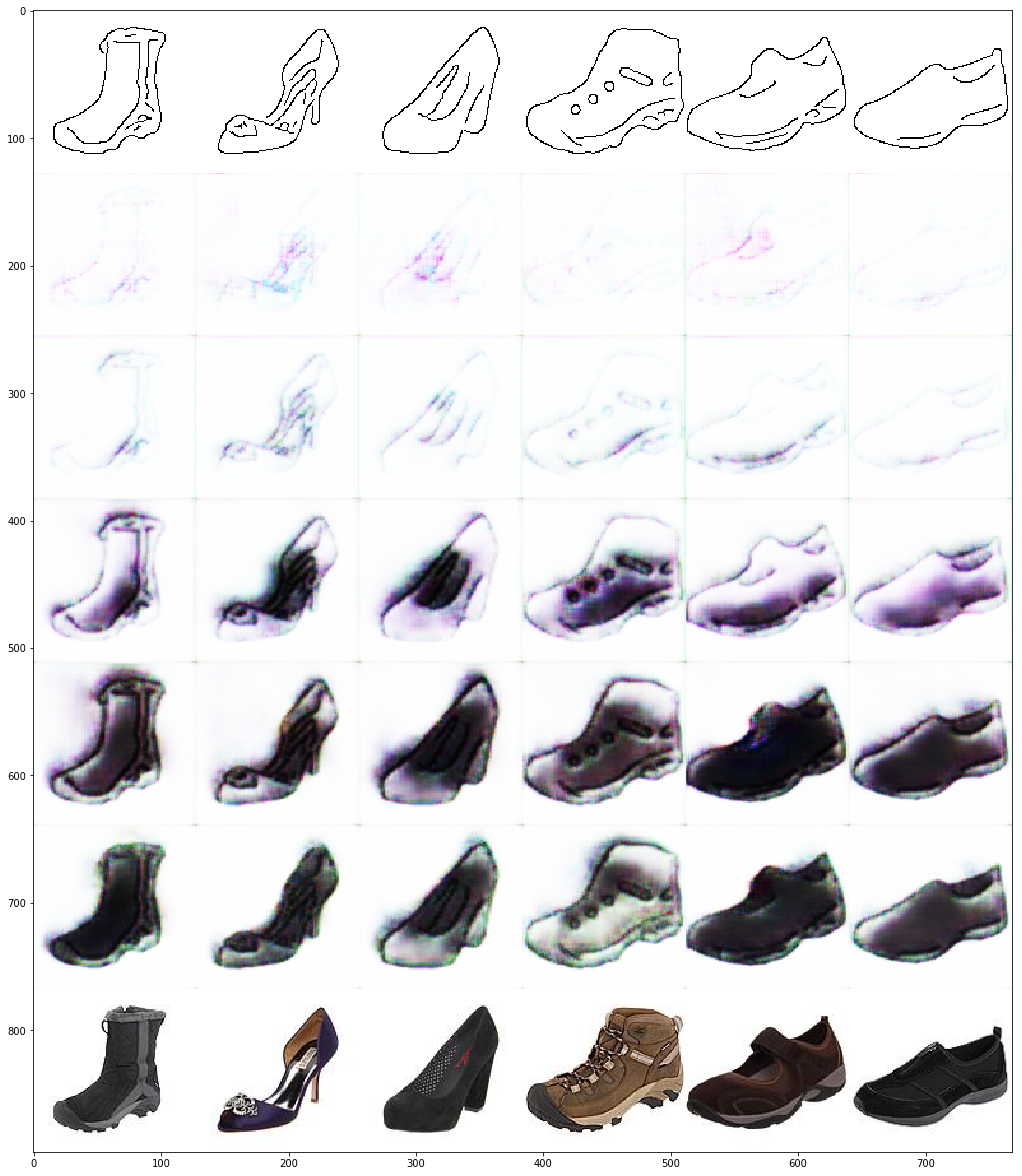

checkpoint  cGAN train_loss  cGAN dev_loss  disc_mean_train_acc  \
0         0.00           279.15         279.15                  0.5   
1         0.25           345.64         282.81                  1.0   
2         0.50           151.05         145.49                  1.0   
3         0.75            62.92          94.10                  0.5   
4         1.00            85.01          99.04                  0.5   
5         1.25            40.92          96.91                  0.5   
6         1.50            88.36          96.44                  0.5   
7         1.75            59.87          96.87                  0.5   
8         2.00            80.11          94.24                  0.5   
9         2.25            37.44          94.27                  0.5   
10        2.50            80.13          87.84                  0.5   
11        2.75            52.58          83.01                  0.5   
12        3.00            56.34          69.52                  0.5   
13        3.25            32.98          82.95                  0.5   
14        3.50            53.84          48.91                  0.5   
15        3.75            38.14          49.76                  0.5   
16        4.00            34.16          40.42                  0.5   
17        4.25            21.26          52.84                  0.5   
18        4.50            31.19          30.93                  0.5   
19        4.75            30.31          40.85                  0.5   
20        5.00            23.45          38.97                  0.5   

    disc_mean_dev_acc  disc_train_acc_real  disc_train_acc_fake  \
0                0.50                  1.0                  0.0   
1                0.81                  1.0                  1.0   
2                1.00                  1.0                  1.0   
3                0.50                  1.0                  0.0   
4                0.50                  1.0                  0.0   
5                0.50                  1.0                  0.0   
6                0.50                  1.0                  0.0   
7                0.50                  1.0                  0.0   
8                0.50                  1.0                  0.0   
9                0.50                  1.0                  0.0   
10               0.50                  1.0                  0.0   
11               0.50                  1.0                  0.0   
12               0.50                  1.0                  0.0   
13               0.50                  1.0                  0.0   
14               0.50                  1.0                  0.0   
15               0.50                  1.0                  0.0   
16               0.50                  1.0                  0.0   
17               0.50                  1.0                  0.0   
18               0.50                  1.0                  0.0   
19               0.50                  1.0                  0.0   
20               0.50                  0.0                  1.0   

    disc_dev_acc_real  disc_dev_acc_fake  
0                1.00                0.0  
1                0.62                1.0  
2                1.00                1.0  
3                1.00                0.0  
4                1.00                0.0  
5                1.00                0.0  
6                1.00                0.0  
7                1.00                0.0  
8                1.00                0.0  
9                1.00                0.0  
10               1.00                0.0  
11               1.00                0.0  
12               1.00                0.0  
13               1.00                0.0  
14               1.00                0.0  
15               1.00                0.0  
16               1.00                0.0  
17               1.00                0.0  
18               1.00                0.0  
19               1.00                0.0  
20               0.00                1.0

In [7]:
from cGAN_functions_opt import sketch2pic
cGAN = sketch2pic(name='canary', generator_activation='tanh')
cGAN.train(img_pairs[:400], img_pairs[:100], batch_size=4, epochs=5, checkpoints_batch_size=8)
cGAN.history.plot_examples()
cGAN.history.return_metrics()

## New run

compiled discriminators
compiled generator
Running epoch 1 of 6...             
Running epoch 2 of 6...             
Running epoch 3 of 6...             
Running epoch 4 of 6...             
Running epoch 5 of 6...             
Running epoch 6 of 6...             
Training completed in 28 minutes             


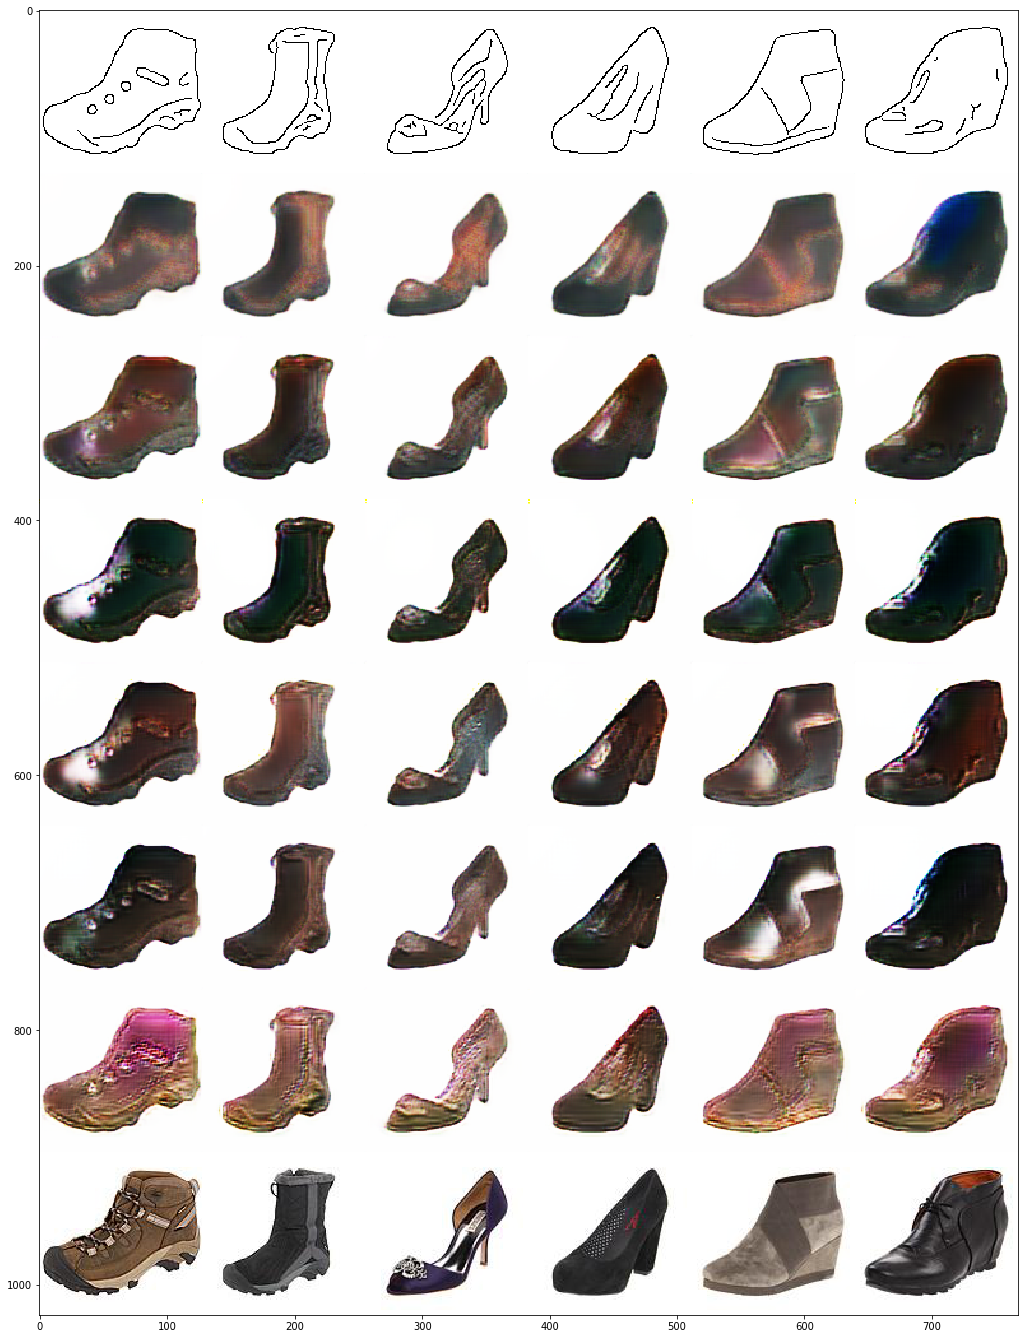

checkpoint    train_loss      dev_loss  train_accuracy  dev_accuracy
0         0.00  12547.427631  12547.427631        3.918050      3.918050
1         0.25   1172.428990   1102.614656        1.141653      1.085392
2         0.50    783.281029    999.657687        1.289307      1.285486
3         0.75    329.438440   1094.211181        1.765689      1.431608
4         1.00    367.704881    946.752534        2.541792      2.213028
5         1.25    897.554848    860.680982        1.343944      1.365099
6         1.50    951.303198   1071.646949        1.386260      1.451222
7         1.75   -147.708959    610.206369        6.433641      5.629800
8         2.00    440.696486    967.226367        1.830238      1.418131
9         2.25    954.604824    984.368762        1.132288      1.231838
10        2.50    749.857935    887.913199        1.465498      1.372419
11        2.75    347.692923   1064.311305        1.457136      1.134968
12        3.00    586.318058   1276.337180        2.618514      2.670067
13        3.25   1085.860304   1148.975818        2.085191      2.282189
14        3.50   1108.935890   1189.002357        1.364426      1.337743
15        3.75    348.728687   1111.246568        1.446216      1.325137
16        4.00    495.572747   1089.782390        1.577789      1.429837
17        4.25    991.908452   1069.712028        1.404604      1.397126
18        4.50    999.919155    930.848356        1.411352      1.486753
19        4.75    334.621829    939.814737        1.335603      1.512574
20        5.00    421.939625   1052.576401        1.815389      1.508452
21        5.25    939.767605   1007.828876        2.625996      2.306649
22        5.50   1444.579766   1439.174786        1.839748      1.698858
23        5.75    344.002616    784.662117        1.425257      1.563584
24        6.00    608.827487   1061.901138        1.375645      1.391961

In [19]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='canary', generator_activation='tanh')
cGAN.train(img_pairs, img_pairs[:100], batch_size=4, epochs=6)
cGAN.history.plot_examples()
cGAN.history.return_metrics()

## Reduced alpha, paper init

compiled discriminators
compiled generator
Running epoch 1 of 4...             
Running epoch 2 of 4...             
Running epoch 3 of 4...             
Running epoch 4 of 4...             
Training completed in 9 minutes             


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


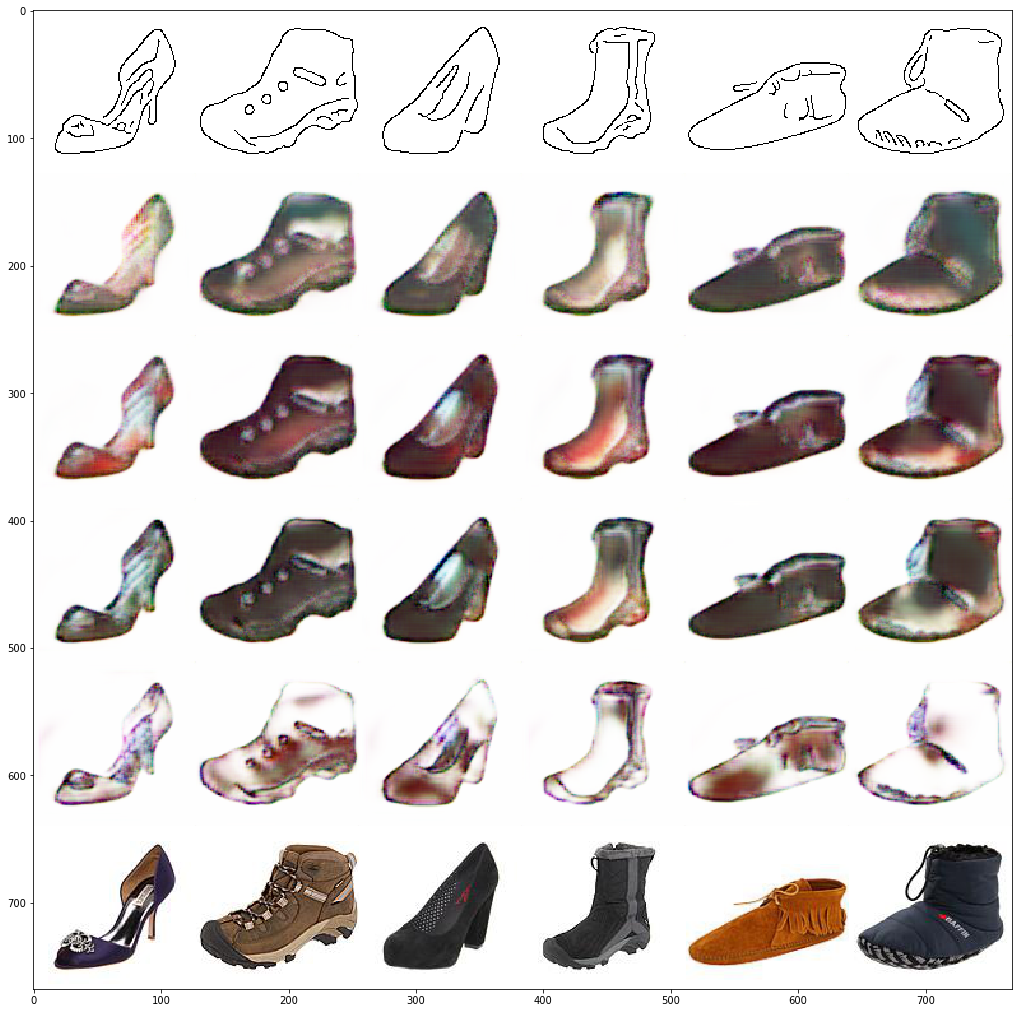

checkpoint    train_loss      dev_loss  train_accuracy  dev_accuracy
0         0.00  1.465827e+04  1.465827e+04        1.454911      1.454911
1         0.25  1.359257e+03  1.541854e+03        1.459021      1.576494
2         0.50 -4.518871e+02  7.819758e+01       15.455594     17.125622
3         0.75  6.046117e+02  6.374633e+02        1.489302      1.676003
4         1.00  5.954580e+02  5.750279e+02        1.847926      1.783331
5         1.25  6.540685e+02  7.739615e+02        1.630603      1.658746
6         1.50          -inf          -inf       14.989627     10.391862
7         1.75  4.946849e+02  4.683205e+02        2.132935      2.341351
8         2.00  6.353581e+02  5.413711e+02        1.582691      1.554162
9         2.25          -inf          -inf        7.809323      5.576074
10        2.50  6.161833e+02  8.068243e+02        1.376928      1.354131
11        2.75 -1.295006e+03 -1.267495e+03       19.818502     20.165842
12        3.00  5.579579e+02  5.522469e+02        1.816324      1.728398
13        3.25          -inf          -inf        4.011927      6.131362
14        3.50          -inf          -inf       18.339540      7.979946
15        3.75  4.750973e+02  6.244860e+02        1.910818      1.583761
16        4.00  9.405493e+02  1.316622e+03        2.049632      2.073014

In [2]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='canary', generator_activation='tanh')
cGAN.train(img_pairs, img_pairs[:100], batch_size=4, epochs=4)
cGAN.history.plot_examples()
cGAN.history.return_metrics()

compiled discriminators
compiled generator
Running epoch 1 of 5...             
Running epoch 2 of 5...             
Running epoch 3 of 5...             
Running epoch 4 of 5...             
Running epoch 5 of 5...             
Training completed in 22 minutes             


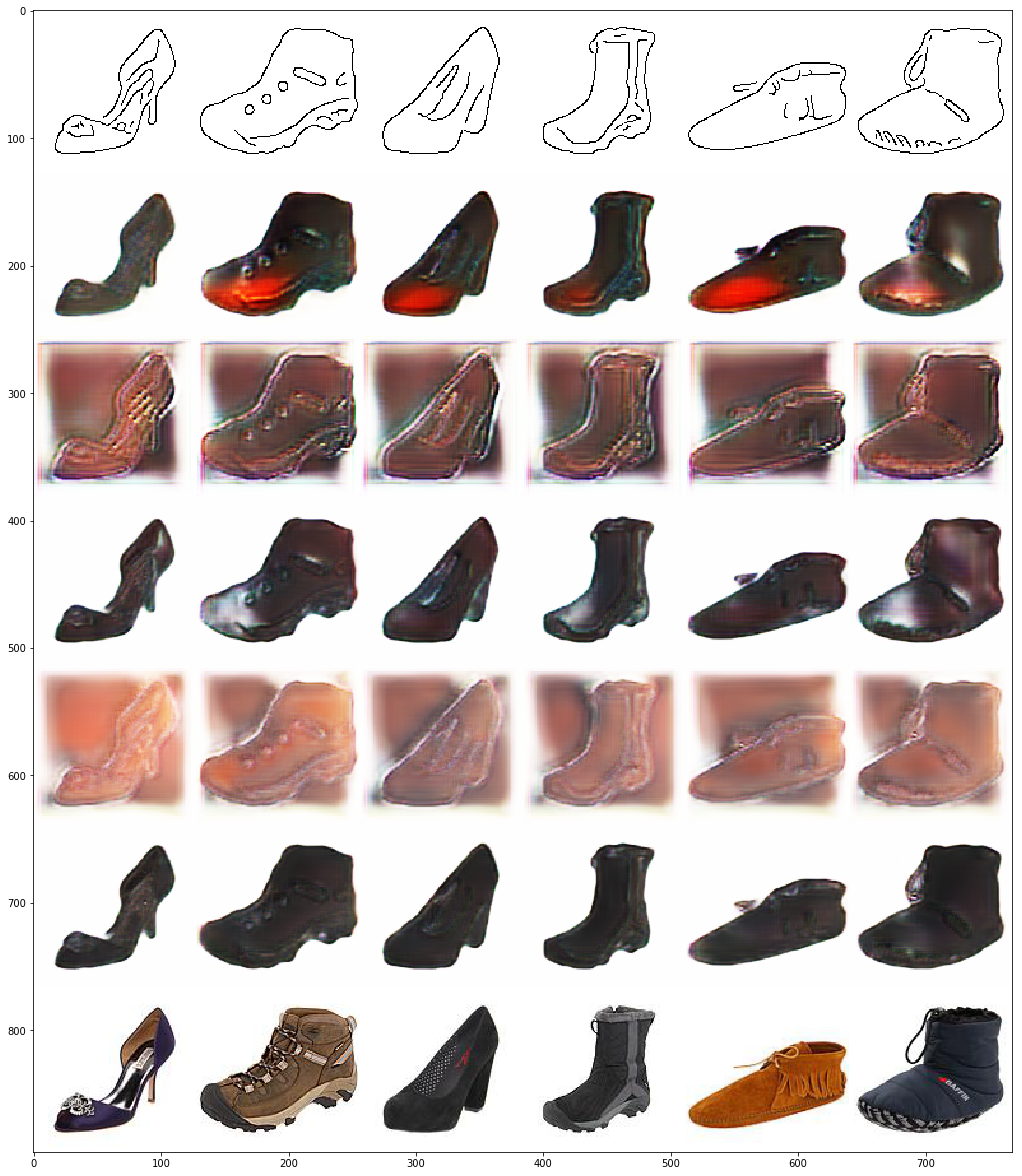

checkpoint   train_loss     dev_loss  train_accuracy  dev_accuracy
0         0.00  7075.655426  7075.655426        2.364826      2.364826
1         0.25   243.041788   707.098491        7.594002      5.337223
2         0.50   420.980544   365.113539        3.482754      3.353580
3         0.75   358.532030   453.138368        2.009130      1.521647
4         1.00   195.475519   453.335714        2.063201      2.075365
5         1.25   580.108324   775.216238        1.670971      1.446553
6         1.50   601.258264   793.927732        1.579071      1.553170
7         1.75   386.389445   576.468459        2.094168      1.653284
8         2.00  2535.976771  2308.535000        2.865716      3.150085
9         2.25   423.089766   992.861016        7.658457      2.427186
10        2.50   791.875015  1333.558529        1.163824      1.463573
11        2.75   479.399333   618.254591        1.532689      1.602628
12        3.00   244.222633   549.259025        1.471033      1.378593
13        3.25   853.439120  1179.442479        1.620479      1.296505
14        3.50   980.575919  1548.627042        1.060127      0.927318
15        3.75    46.509807   342.011488        3.893849      2.022406
16        4.00  2188.047677  2085.925122        3.585747      3.396839
17        4.25   707.939153   818.753626        1.706701      1.636875
18        4.50   350.503853   455.564960        2.963364      3.469019
19        4.75   114.793038   582.007589        7.376021      6.288473
20        5.00   165.817488   389.219454        1.698502      1.807300

In [6]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='canary', generator_activation='sigmoid')
cGAN.train(img_pairs, img_pairs[:100], batch_size=4, epochs=5)
cGAN.history.plot_examples()
cGAN.history.return_metrics()

compiled discriminators
compiled generator
Running epoch 1 of 4...             
Running epoch 2 of 4...             
Running epoch 3 of 4...             
Running epoch 4 of 4...             
Training completed in 9 minutes             


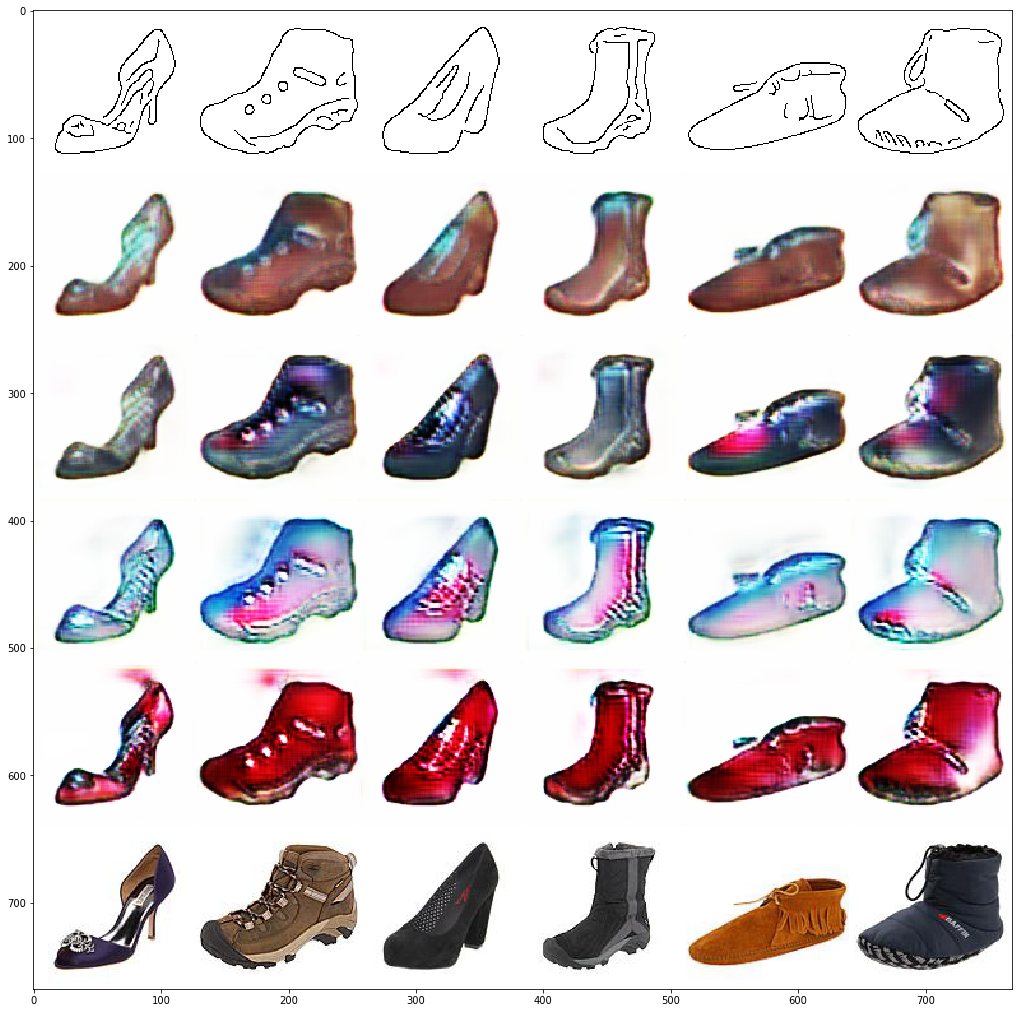

checkpoint   train_loss     dev_loss  train_accuracy  dev_accuracy
0         0.00  6860.387656  6860.387656        1.944791      1.944791
1         0.25  1471.296823  1833.953399        0.905276      0.834349
2         0.50   894.690943  1125.426933        1.419789      1.345552
3         0.75   452.454365   463.877877        2.441046      2.822181
4         1.00   684.207077   582.852705        1.447758      1.557037
5         1.25   598.763555   841.545596        1.878720      1.858739
6         1.50   543.775161   778.371299        3.502119      3.028816
7         1.75   626.486513   673.896506        2.450002      2.420403
8         2.00   652.464910   605.876324        1.489768      1.482994
9         2.25   614.608702   767.388119        2.292485      1.849798
10        2.50   754.808478   724.638304        2.043983      1.892694
11        2.75   572.949508   560.371874        2.828120      2.412683
12        3.00  1090.807313  1291.136529        0.886563      0.867704
13        3.25   433.522621   494.386728        2.202492      1.586174
14        3.50   872.485836   575.484229        1.937185      1.758558
15        3.75  1927.473844  2318.654458        1.240167      0.898143
16        4.00   857.691100   758.868932        1.251444      1.274093

In [3]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='canary', generator_activation='sigmoid')
cGAN.train(img_pairs, img_pairs[:100], batch_size=4, epochs=4)
cGAN.history.plot_examples()
cGAN.history.return_metrics()